In [10]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
#plt.xkcd()
#sys.path.insert(1, r'C:\Users\smartin5\Repos\myNeurochat')
sys.path.insert(1, r'C:\Users\maolivei\neuro_sean\NeuroChaT')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import neurochat.nc_plot as nc_plot
from neurochat.nc_datacontainer import NDataContainer
from neurochat.nc_containeranalysis import place_cell_summary

In [14]:
container =NDataContainer(load_on_fly=True)


In [15]:
container.add_axona_files_from_dir(r"D:\PhD\Chapter6\data_6s\MSC5\010518-MSC5-small\MSC5_to_analyse")

In [16]:
container.setup()

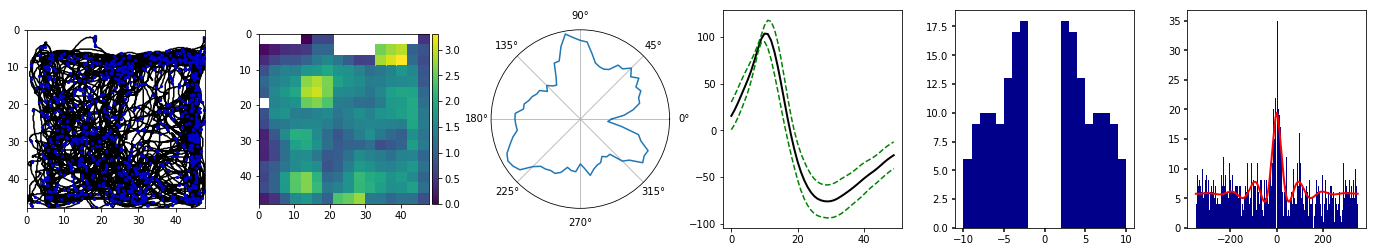

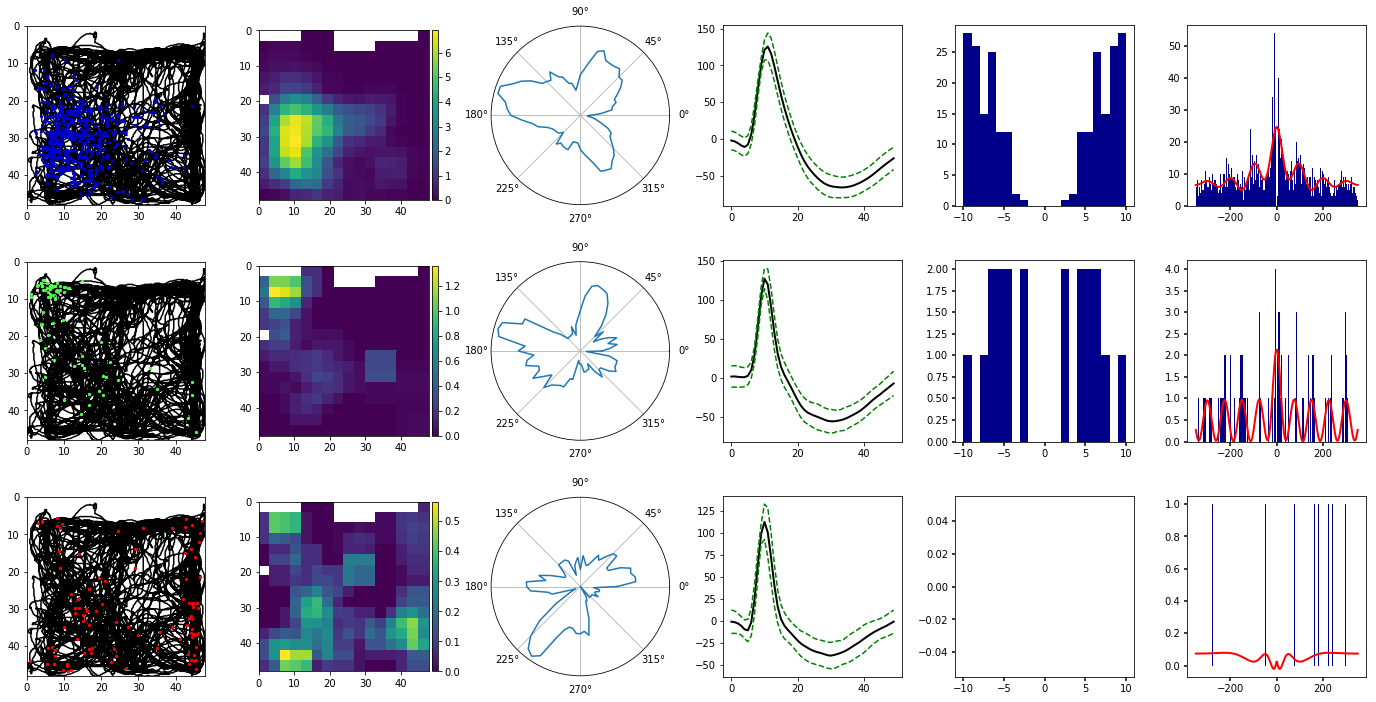

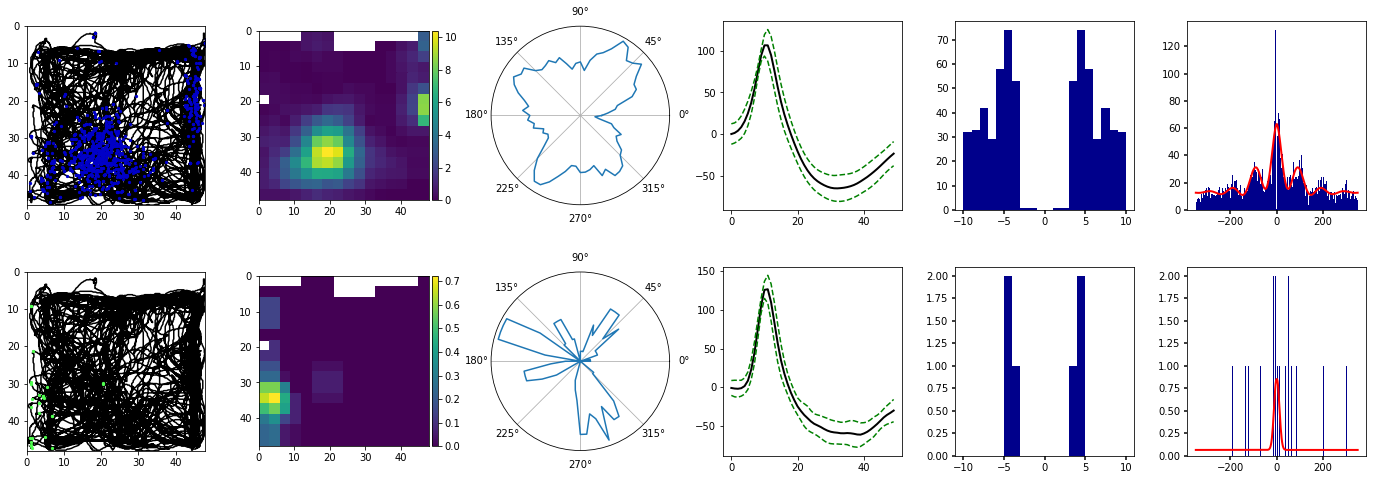

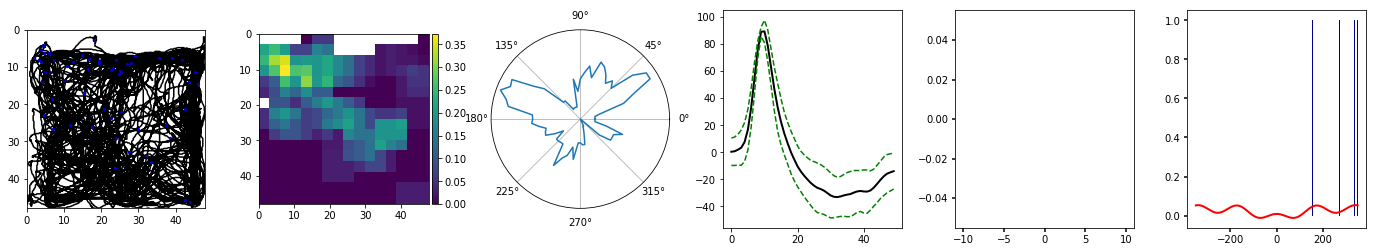

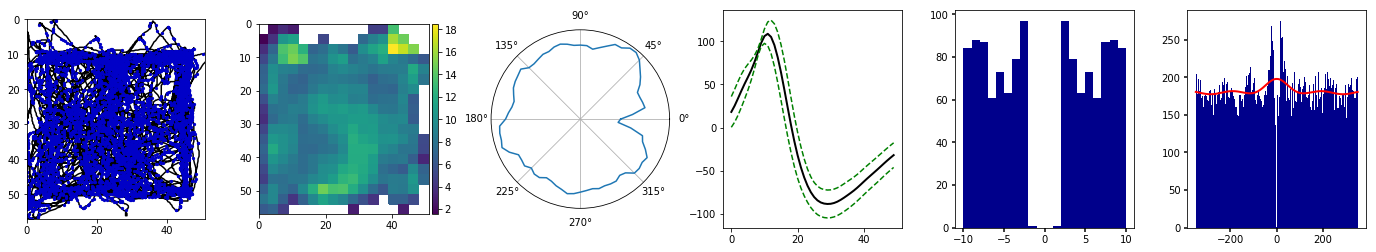

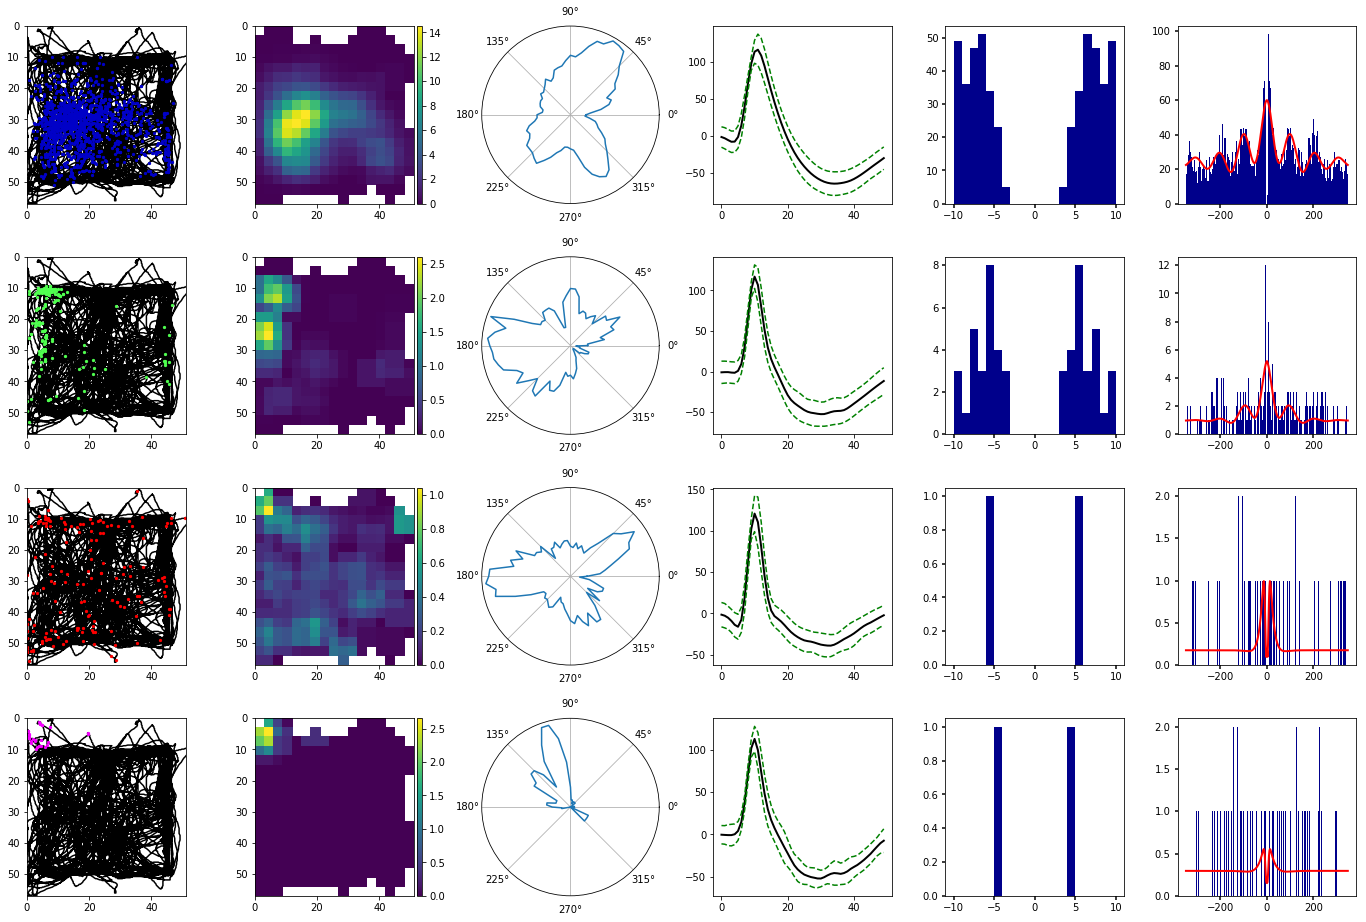

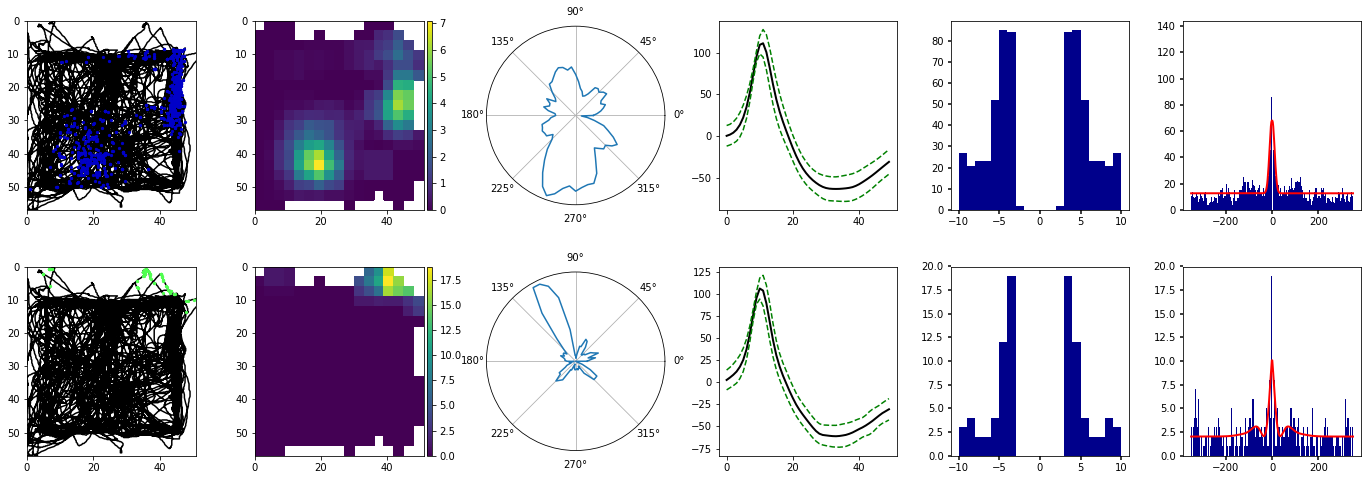

In [17]:
place_cell_summary(container)

In [ ]:
spike = NSpike(system="Axona")
spike.set_name("CO")
spat = NSpatial(system="Axona")
spat.set_name("S0")


data_dir = 
spike_name = "040319C_LCA1_open-arena_15min.2"
pos_name = "040319C_LCA1_open-arena_15min_1.txt"
spike.set_filename(os.path.join(data_dir, spike_name))
spat.set_filename(os.path.join(data_dir, pos_name))

In [ ]:
spike.load()
spat.load()

In [ ]:
colorcells = []

In [ ]:
# create Axona cell colours

colorcells.append((0,0,200/255))
colorcells.append((80/255,1,80/255))
colorcells.append((1,0,0))
colorcells.append((245/255,0,1))
colorcells.append((75/255,200/255,255/255))
colorcells.append((0/255, 185/255,0/255))
colorcells.append((255/255, 185/255,50/255))
colorcells.append((0/255, 150/255,175/255))
colorcells.append((150/255, 0/255,175/255))
colorcells.append((170/255, 170/255,0/255))
colorcells.append((200/255, 0/255,0/255))
colorcells.append((255/255, 255/255,0/255))
colorcells.append((140/255, 140/255,140/255))
colorcells.append((0/255, 255/255,255/255))
colorcells.append((255/255, 0/255,160/255))
colorcells.append((175/255, 75/255, 75/255))
colorcells.append((255/255, 155/255, 175/255))
colorcells.append((190/255, 190/255, 190/255))
colorcells.append((255/255, 255/255, 75/255))
colorcells.append((154/255, 205/255, 50/255))
colorcells.append((255/255, 99/255, 71/255))
colorcells.append((0/255, 255/255, 127/255))
colorcells.append((255/255, 140/255, 0/255))
colorcells.append((32/255, 178/255, 170/255))
colorcells.append((255/255, 69/255, 0/255))
colorcells.append((240/255, 230/255, 140/255))
colorcells.append((100/255, 145/255, 237/255))
colorcells.append((255/255, 218/255, 185/255))
colorcells.append((153/255, 50/255, 204/255))
colorcells.append((250/255, 128/255, 114/255))

In [ ]:
units = spike.get_unit_list()

In [ ]:
ndata = NData()
ndata.spike = spike
ndata.spatial = spat

In [ ]:
placedata=[]
graphdata=[]
wavedata=[]
for i in units:
    spike.set_unit_no(i)
    placedata.append(ndata.place(pixel=3, filter=['b', 3], range=[0, spat.get_duration()], chop_bound=0, fieldThresh=0.2, minPlaceFieldNeighbours=0, smoothPlace=False))
    graphdata.append(ndata.isi_corr(bins = 1, bound = [-10, 10]))
    wavedata.append(ndata.wave_property())

In [ ]:
def create_grid(rows, cols=4, size_multiplier=4, wspace=1.3, hspace=1.5):
    fig = plt.figure(
        figsize=(cols * size_multiplier, rows * size_multiplier), 
        tight_layout=True)
    gs = gridspec.GridSpec(2 * rows, 2 * cols, wspace=wspace, hspace=hspace)
    for i in range(rows):
        
        # Plot the spike position
        place_data = placedata[i]
        ax = fig.add_subplot(gs[2*i:2*(i+1),0:2])
        ax.plot(place_data['posX'], place_data['posY'], color='black', zorder=1)
        ax.scatter(place_data['spikeLoc'][0], place_data['spikeLoc'][1], \
           s=80, marker='.', color=colorcells[i], zorder=2)
        ax.invert_yaxis()
        
        # Plot the rate map
        ax11 = fig.add_subplot(gs[2*i:2*(i+1),2:4])
        nc_plot.loc_rate(place_data, ax=ax11, smooth=True)
        
        
        # Plot -10 to 10 autocorrelation    
        nc_plot.isi_corr(graphdata[i], ax=fig.add_subplot(gs[2*i:2*(i+1),4:6]))
    
        
        # Plot wave property
        wave_data = wavedata[i]
        ax1 = fig.add_subplot(gs[2*i, 6])
        ax1.plot(wave_data['Mean wave'][:,0], color='black', linewidth=1.0)
        ax1.plot(wave_data['Mean wave'][:,0]+wave_data['Std wave'][:, 0],\
          color='green', linestyle='dashed')
        ax1.plot(wave_data['Mean wave'][:,0]-wave_data['Std wave'][:, 0],\
          color='green', linestyle='dashed')
        
        ax2 = fig.add_subplot(gs[2*i, 7])
        ax2.plot(wave_data['Mean wave'][:,1], color='black', linewidth=1.0)
        ax2.plot(wave_data['Mean wave'][:, 1]+wave_data['Std wave'][:, 1],\
          color='green', linestyle='dashed')
        ax2.plot(wave_data['Mean wave'][:, 1]-wave_data['Std wave'][:, 1],\
          color='green', linestyle='dashed')
        
        ax3 = fig.add_subplot(gs[2*i+1, 6])
        ax3.plot(wave_data['Mean wave'][:,2], color='black', linewidth=1.0)
        ax3.plot(wave_data['Mean wave'][:, 2]+wave_data['Std wave'][:, 2],\
          color='green', linestyle='dashed')
        ax3.plot(wave_data['Mean wave'][:, 2]-wave_data['Std wave'][:, 2],\
          color='green', linestyle='dashed')
        
        ax4 = fig.add_subplot(gs[2*i+1, 7])
        ax4.plot(wave_data['Mean wave'][:,3], color='black', linewidth=1.0)
        ax4.plot(wave_data['Mean wave'][:, 3]+wave_data['Std wave'][:, 3],\
          color='green', linestyle='dashed')
        ax4.plot(wave_data['Mean wave'][:, 3]-wave_data['Std wave'][:, 3],\
          color='green', linestyle='dashed')
    
    #plt.tight_layout()
    return fig

In [ ]:
fig = create_grid(len(units))
plt.savefig(r'C:/Users/maolivei/Desktop/tetrode5.pdf', facecolor='w', papertype='a4')